# 3. Data Preparation

## 3.1 Категориальные переменные должны быть преобразованы в числовые переменные

Переменная type рассматривается как категориальная переменная. Некоторые из  алгоритмов могут обрабатывать только числовые значения, поэтому нам нужно создать новую (фиктивную) переменную для каждого уникального значения категориальных переменных (LabelEncoding), назовем ее cat_feat. Остальные переменные будут носить наименование num_feat.
Теперь белое вино=1, красное=0.

In [233]:
%run cat_features.py
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


## 3.2 Заполнить пропущенные значения в переменных
Большинство алгоритмов машинного обучения требуют, чтобы все переменные имели значения, чтобы использовать их для обучения модели. Самый простой метод - заполнить пропущенные значения средним по переменной для всех наблюдений в обучающем наборе. Но более логично проанализировать возможные варианты по остальным признакам, и заполнить подобными

In [234]:
data.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type                     0
dtype: int64

In [235]:
# %load NaN.py
import pandas as pd

print('Для фиксированной кислотности пустых строк ' + str( len( data[ pd.isnull( data['fixed acidity'] ) ] ) ))
print('Для летучей кислотности пустых строк ' + str( len( data[ pd.isnull( data['volatile acidity'] ) ] ) ))
print('Для лимонной кислоты пустых строк ' + str( len( data[ pd.isnull( data['citric acid'] ) ] ) ))
print('Для остаточного сахара пустых строк ' + str( len( data[ pd.isnull( data['residual sugar'] ) ] ) ))
print('Для хлоридов пустых строк ' + str( len( data[ pd.isnull( data['chlorides'] ) ] ) ))
print('Для Ph пустых строк ' + str( len( data[ pd.isnull( data['pH'] ) ] ) ))
print('Для сульфатов пустых строк ' + str( len( data[ pd.isnull( data['sulphates'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для фиксированной кислотности пустых строк 10
Для летучей кислотности пустых строк 8
Для лимонной кислоты пустых строк 3
Для остаточного сахара пустых строк 2
Для хлоридов пустых строк 2
Для Ph пустых строк 9
Для сульфатов пустых строк 4
Всего строк в наборе 6497


Очевидно, что химические реакции связаны между собой, это значит, что необходимо отследить зависимость фиксированной кислоности и летучей кислотности, хлоридов и тд и на основании этих данных заполнить пустые

In [236]:
data.corrwith(data['fixed acidity']).sort_values(ascending=False)

fixed acidity           1.000000
density                 0.459204
citric acid             0.323736
sulphates               0.300380
chlorides               0.298421
volatile acidity        0.220172
quality                -0.077031
alcohol                -0.095603
residual sugar         -0.112319
pH                     -0.251814
free sulfur dioxide    -0.283317
total sulfur dioxide   -0.329747
type                   -0.487241
dtype: float64

In [237]:
data[data['fixed acidity'].isnull()].groupby('density').head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
17,NaN,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,1
174,NaN,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,1
249,NaN,0.410,0.14,10.4,0.037,18.0,119.0,0.99600,3.38,0.45,10.0,5,1
267,NaN,0.580,0.07,6.9,0.043,34.0,149.0,0.99440,3.34,0.57,9.7,5,1
368,NaN,0.290,0.48,2.3,0.049,36.0,178.0,0.99310,3.17,0.64,10.6,6,1
518,NaN,0.130,0.28,1.9,0.050,20.0,78.0,0.99180,3.43,0.64,10.8,6,1
1079,NaN,NaN,0.29,6.2,0.046,29.0,227.0,0.99520,3.29,0.53,10.1,6,1
2902,NaN,0.360,0.14,8.9,0.036,38.0,155.0,0.99622,3.27,NaN,9.4,5,1
6428,NaN,0.440,0.09,2.2,0.063,9.0,18.0,0.99444,NaN,0.69,11.3,6,0
6429,NaN,0.705,0.10,2.8,0.081,13.0,28.0,0.99631,NaN,0.66,10.2,5,0


In [238]:
((data.groupby('fixed acidity')['density'].value_counts()).sort_values(ascending=False))

fixed acidity  density
7.4            0.99860    13
7.0            0.99540    12
6.4            0.99480     9
7.3            0.99807     8
6.8            0.99530     8
                          ..
7.2            0.99930     1
               0.99920     1
               0.99900     1
               0.99800     1
3.8            0.99248     1
Name: density, Length: 4188, dtype: int64

Судя по данным корреляции и результатам выше, чем выше плотность, тем выше фиксированная кислотность

In [239]:
data.loc[data['fixed acidity'].isnull(), 'fixed acidity'] = data.groupby('density')['fixed acidity'].transform('mean')
data.loc[data['fixed acidity'].isnull(), 'fixed acidity'] = data.loc[(data['density']>0.9963)&(data['density']<0.9964)]['fixed acidity'].mean()

data[data['fixed acidity'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


Пустых значений в переменной фиксированной кислотности больше нет. Проделаем то же самое с остальными пропущенными - на основании корреляции заполним все средние

In [240]:
data.corrwith(data['volatile acidity']).sort_values(ascending=False)

volatile acidity        1.000000
chlorides               0.377167
density                 0.271193
pH                      0.260660
sulphates               0.225476
fixed acidity           0.219796
alcohol                -0.038248
residual sugar         -0.196702
quality                -0.265953
free sulfur dioxide    -0.353230
citric acid            -0.378061
total sulfur dioxide   -0.414928
type                   -0.652875
dtype: float64

In [241]:
((data.groupby('volatile acidity')['chlorides'].value_counts()).sort_values(ascending=False))

volatile acidity  chlorides
0.22              0.044        20
0.32              0.050        18
0.24              0.050        17
0.23              0.044        17
0.28              0.040        17
                               ..
0.44              0.095         1
                  0.100         1
                  0.107         1
                  0.114         1
0.37              0.025         1
Name: chlorides, Length: 2668, dtype: int64

In [242]:
data.loc[data['volatile acidity'].isnull(), 'volatile acidity'] = data.groupby('chlorides')['volatile acidity'].transform('mean')
data[data['volatile acidity'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [243]:
data.corrwith(data['citric acid']).sort_values(ascending=False)

citric acid             1.000000
fixed acidity           0.323108
total sulfur dioxide    0.195218
type                    0.187126
residual sugar          0.142486
free sulfur dioxide     0.133437
density                 0.096320
quality                 0.085706
sulphates               0.057613
chlorides               0.039315
alcohol                -0.010433
pH                     -0.328689
volatile acidity       -0.377678
dtype: float64

In [244]:
data.loc[data['citric acid'].isnull(), 'citric acid'] = data.groupby('citric acid')['fixed acidity'].transform('mean')
data.loc[data['citric acid'].isnull(), 'citric acid'] = data.groupby('citric acid')['volatile acidity'].transform('mean')
data.loc[data['citric acid'].isnull(), 'citric acid'] = data.groupby('citric acid')['pH'].transform('mean')
data.loc[data['citric acid'].isnull(), 'citric acid'] = data.loc[(data['fixed acidity']>5.2)&(data['fixed acidity']<5.4)]['citric acid'].mean()
data[data['citric acid'].isnull()]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [245]:
data.corrwith(data['pH']).sort_values(ascending=False)

pH                      1.000000
volatile acidity        0.260118
sulphates               0.191248
alcohol                 0.121002
chlorides               0.044806
quality                 0.019366
density                 0.011920
free sulfur dioxide    -0.145191
total sulfur dioxide   -0.237687
fixed acidity          -0.251813
residual sugar         -0.267050
citric acid            -0.328686
type                   -0.328727
dtype: float64

In [246]:
((data.groupby('volatile acidity')['pH'].value_counts()).sort_values())#ascending=False))

volatile acidity  pH  
1.58              3.50     1
0.28              3.53     1
                  3.45     1
                  3.41     1
                  3.40     1
                          ..
0.23              3.23    15
0.27              3.16    15
0.20              3.14    15
0.21              3.25    16
0.30              3.18    16
Name: pH, Length: 2628, dtype: int64

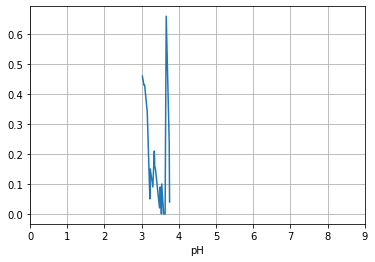

In [247]:
data[(data['volatile acidity']>1)].groupby(['pH'])['citric acid'].sum().plot(grid=True, xticks=range(0,10))


In [248]:
data.loc[(data['pH'].isnull())&(data['volatile acidity']>=0.2)&(data['volatile acidity']<=0.23), 'pH'] \
= data.groupby('volatile acidity')['pH'].transform('mean')
data.loc[(data['pH'].isnull())&(data['volatile acidity']>=0.28)&(data['volatile acidity']<=0.32), 'pH'] \
= data.groupby('volatile acidity')['pH'].transform('mean')
data.loc[(data['pH'].isnull())&(data['volatile acidity']>=0.43)&(data['volatile acidity']<=0.45), 'pH'] \
= data.groupby('volatile acidity')['pH'].transform('mean')
data.loc[(data['pH'].isnull())&(data['volatile acidity']>=0.695)&(data['volatile acidity']<=0.71), 'pH'] \
= data.groupby('volatile acidity')['pH'].transform('mean')
data[data['pH'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [249]:
data.corrwith(data['sulphates']).sort_values(ascending=False)

sulphates               1.000000
chlorides               0.395332
fixed acidity           0.300390
density                 0.259454
volatile acidity        0.225491
pH                      0.191274
citric acid             0.057391
quality                 0.038729
alcohol                -0.003261
residual sugar         -0.185745
free sulfur dioxide    -0.188489
total sulfur dioxide   -0.275381
type                   -0.486916
dtype: float64

In [250]:
data['sulphates'].value_counts()

0.50    275
0.46    243
0.54    234
0.44    232
0.38    214
       ... 
1.59      1
1.12      1
1.33      1
1.56      1
1.62      1
Name: sulphates, Length: 111, dtype: int64

In [251]:
((data.groupby('chlorides')['sulphates'].value_counts()).sort_values(ascending=False))

chlorides  sulphates
0.047      0.46         18
0.044      0.46         16
0.036      0.44         15
0.044      0.48         15
0.054      0.50         15
                        ..
0.069      0.62          1
           0.63          1
           0.72          1
           0.74          1
0.009      0.37          1
Name: sulphates, Length: 2617, dtype: int64

In [252]:
data.loc[data['sulphates'].isnull(), 'sulphates'] = data.groupby('chlorides')['sulphates'].transform('mean')
data[data['sulphates'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [253]:
data.corrwith(data['residual sugar']).sort_values(ascending=False)

residual sugar          1.000000
density                 0.552498
total sulfur dioxide    0.495820
free sulfur dioxide     0.403439
type                    0.349000
citric acid             0.142336
quality                -0.036825
fixed acidity          -0.111727
chlorides              -0.128902
sulphates              -0.185771
volatile acidity       -0.196394
pH                     -0.266812
alcohol                -0.359706
dtype: float64

In [254]:
data.loc[data['residual sugar'].isnull(), 'residual sugar'] = data.groupby('density')['residual sugar'].transform('mean')
data[data['residual sugar'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [255]:
data.corrwith(data['chlorides']).sort_values(ascending=False)

chlorides               1.000000
sulphates               0.395272
volatile acidity        0.377340
density                 0.362594
fixed acidity           0.298402
pH                      0.044908
citric acid             0.039301
residual sugar         -0.128864
free sulfur dioxide    -0.195042
quality                -0.200886
alcohol                -0.256861
total sulfur dioxide   -0.279580
type                   -0.512622
dtype: float64

In [256]:
data.loc[data['chlorides'].isnull(), 'chlorides'] = data.groupby('sulphates')['chlorides'].transform('mean')
data[data['chlorides'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [257]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [258]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


Больше пропущенных значений нет,- не будет проблем, связанными с ними, при построении некоторых моделей построении

In [263]:
data.to_csv('wine_qual_EDA.csv', index = False)

In [264]:
data = pd.read_csv('wine_qual_EDA.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
